<a href="https://colab.research.google.com/github/jlee1998/Advanced-Project-in-Mathematics/blob/main/Data_Science_Coursework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science Coursework 3 Jonghyeon Lee#

---


##Task 1: Unsupervised Learning: text documents with an associated citation graph##
In this unsupervised learning task, there is no train or test set and therefore no regression or classification model to fit. Often, as is the case in our example, we are given data that we want to group into a set number of clusters; a cluster is a set of points that are closer to each other than they are to any point that lies outside the set. Here are some of the questions that arise logically:

1. Which algorithm do we use to cluster our data?
2. How do we decide how many clusters to split data into?
3. What are the properties of this optimal clustering?

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
#import feature matrix with pandas
feature_matrix = pd.read_csv(io.BytesIO(uploaded['feature_matrix.csv']))

Saving feature_matrix.csv to feature_matrix.csv


##1.1 Clustering of the feature matrix##
The clustering algorithm we have been instructed to use is the k-means algorithm.

The k-means algorithm assigns each point to one of the k-clusters at random, then evaluates the centroid of each of these clusters:
$c_q=\frac{1}{|C_q|}\sum_{x^{i}\in C_q} x^{(i)}$ where $x^{(i)}$ is the vector formed by the elements of each row of our $ 2485\times 1433$ frequency matrix and $|C_q|$ is the number of elements in each cluster.

After that, we reassign each of our $x^{(i)}$s to the nearest $c_q$. In other words, for each $i$, compute $\mathrm{argmin}_q ||x^{(i)}-c_q||^2$. We repeat our entire process until the assignments are no longer changing; that is, there is no further change in our within-cluster normalized distance $W(C)=\frac{1}{2}\sum^k_{q=1}\frac{1}{|C_q|}\sum_{i,j \in C_q} ||x^{(i)}-x^{(j)}||^2$ as defined in the lecture notes.

The optimal number of clusters $k*$ is the lowest $k$ that results in a Calinski-Harabasz score of below 7. The Calinski-Harabasz score $s$, also known as the variance ratio criterion, is defined below:

$s=\frac{\mathrm{tr}(B_k)}{\mathrm{tr}(W_k)}\frac{(n_E-k)}{(k-1)}$
, where $k$ is the number of clusters,$n_E$ is the size of our data $E$, and $B_k$ and $W_k$ are our group dispersion and within-cluster matrices respectively:

$W_k=\sum^k_{q=1}\sum_{x\in C_q} (x-c_q)(x-c_q)^T$, $B_k=\sum^k_{q=1} n_q (c_q-c_E)(c_q-c_E)^T$

where $c_q$ is the centroid of each cluster $q\in \{1,...,k\}$, $c_E$ is the centroid of the entire dataset and $n_q$ is the number of points in each cluster.



Text(0.5, 1.0, 'Calinski-Harabasz score against number of clusters')

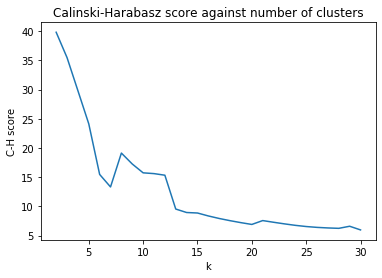

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
ch_scores=np.zeros(29)
k=range(2,31)
for K in k:
  #fit k means model with K clusters to feature matrix
  kmeans_model = KMeans(n_clusters=K,random_state=0).fit(feature_matrix)
  labels = kmeans_model.labels_
  #compute C-H score for each K
  ch_scores[K-2]=metrics.calinski_harabasz_score(feature_matrix, labels)
#Plot k against C-H score
plt.plot(k,ch_scores)
plt.xlabel("k")
plt.ylabel("C-H score")
plt.title("Calinski-Harabasz score against number of clusters")

In [ ]:
ch_scores

array([39.82545685, 35.48099291, 29.81172336, 24.12624588, 15.46512625,
       13.32031103, 19.12582007, 17.25225488, 15.73886841, 15.60572472,
       15.33149969,  9.53575524,  8.94157945,  8.85695129,  8.35234369,
        7.91755959,  7.54167303,  7.20305698,  6.89747784,  7.55940181,
        7.27086979,  6.99483356,  6.74342331,  6.53997724,  6.39400749,
        6.29687484,  6.22996803,  6.58764877,  5.9593775 ])

In [ ]:
#find the lowest k such that C-H score is under 7
[ n+1 for n,i in enumerate(ch_scores) if i<7 ][1] 

22

In [ ]:
#report centroid of chosen model
kmeans22 = KMeans(n_clusters=22, random_state=1).fit(feature_matrix)
labels = kmeans22.labels_
centers=kmeans22.cluster_centers_

In [ ]:
#show labels
kmeans22.labels_

array([ 2, 16, 12, ...,  6,  2,  2], dtype=int32)

Here are some of the features of our optimal clustering:

[  3   2 356   2   1   3 751   1   3  14   1   9 509 519   1  47 159  98
   1   1   2   2]


Text(0.5, 1.0, 'Distribution of Elements across Clusters')

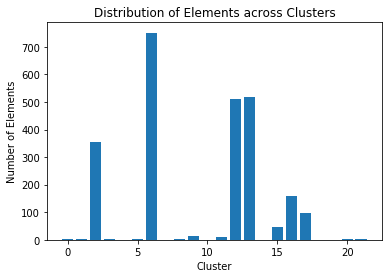

In [ ]:
#count number of points in each cluster
counts = np.bincount(labels[labels>=0])
print(counts)
#plot cluster versus number of elements as bar chart
plt.bar(range(22),counts)
plt.xlabel('Cluster')
plt.ylabel('Number of Elements')
plt.title('Distribution of Elements across Clusters')

The distribution is very uneven: some of the clusters have more than a hundred points, whereas six are composed of a single point.

Next, we report the within cluster dissimilarity and the across cluster dissimilarity for our optimal clustering:

$W(C)=\frac{1}{2}\sum^k_{q=1}\frac{1}{|C_q|}\sum_{i,j \in C_q} ||x^{(i)}-x^{(j)}||^2$,$B(C)=\frac{1}{2}\sum^N_{i=1}\sum^N_{j=1}||x^{(i)}-x^{(j)}||^2 -W(C)=T-W(C)$, where $T$ is the total dissimilarity.

Ideally, we want a small $W(C)$ and therefore a large $B(C)$.

In [ ]:
sum=0
#turn dataframe to numpy matrix
X_np=feature_matrix.to_numpy()
for i in range(2485):
  for j in range(2485):
    #calculate squared Euclidean distance between any two rows of feature matrix
    sum=sum+np.linalg.norm(X_np[i]-X_np[j])**2
#work out total dissimilarity
total_C=0.5*sum

In [ ]:
sum=0
for i in range(22):
  vc=[]
  for j in range(2485):
    if i==labels[j]:
      #append jth element of matrix if it belongs to i th cluster
      vc.append(X_np[j])
  for k in range(len(vc)):
    for l in range(len(vc)):
      #compute squared Euclidean distances between two vectors in the same cluster
      sum=sum+np.linalg.norm(vc[k]-vc[l])**2
#work out within cluster dissimilarity
W_C=0.5*sum

In [ ]:
W_C

13415213.0

In [ ]:
#calculate between cluster dissimilarity
B_C=total_C-W_C
B_C

92910543.0

We turn our attention to two further questions: 

1. How do we tackle the random nature of the k-means algorithm?

2. What is the significance of the Calinski-Harabasz score?

Let's tackle the question 1 first:

There exist several ways to fight the randomness, but we shall merely list two of the most popular:
1. Run the k-means algorithm repeatedly and choose the clustering with the smallest $W(C)$.
2. Use hierarchical clustering methods such as PCA (Principal Component Analysis)-Part and Var-Part that use a deterministic initialization for the data. 


The PCA-Part initialization method as outlined by Su and Dy (2004), though somewhat outside the scope of this course, is as follows:

1. Calculate the $SSE=\sum_{x_i \in C}||x_i - \mu||^2$ of the whole dataset
2. Split the dataset into two clusters with a hyperplane that goes through the dataset centroid and is perpendicular to the principal eigenvector of the cluster covariance matrix
3. Calculate the $SSE$ of each of the two clusters and select the one with the greater $SSE$.
4. Split that cluster using the same method described in part b)
5. Repeat c and d until we obtain our desired K-clusters.



2. 
Some other common quality scores include the Silhouette Score, defined as below for $N$ samples:
$S=\frac{1}{N}\sum^{N}_{i=1} \frac{b_i-a_i}{\max(a_i,b_i)}$, where $a_i$ is the mean distance between a sample and the remaining points in the same cluster and $b_i$ is the mean distance between a sample and every point in the next closest cluster. $-1 \leq S \leq 1$, with a score of $1$ indicating very dense clustering, $0$ implying overlapping clusters and $-1$ signifying improper clustering. 

Like the Calinski-Harabasz score, the Silhouette coefficient is used in the absence of knowledge of the ground truth labels. However, while Calinski-Harabasz (and also the Davies-Bouldin score, defined later on) defines a good clustering in terms of within cluster similarity and between cluster dissimilarity, the Silhouette score considers the distance between each point and the centroid of its own cluster and the distance between each point and the nearest centroid of any other cluster.

Text(0.5, 1.0, 'Silhouette score against number of clusters')

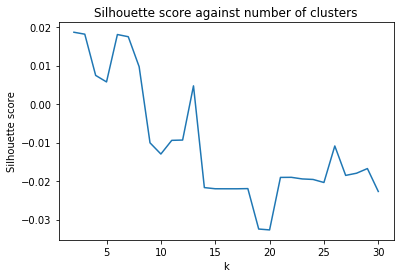

In [ ]:
#plot graph of k against silhouette score
silhouette_scores=np.zeros(29)
k=range(2,31)
for K in k:
  kmeans_model = KMeans(n_clusters=K, random_state=0).fit(feature_matrix)
  labels = kmeans_model.labels_
  silhouette_scores[K-2]=metrics.silhouette_score(feature_matrix, labels,metric='euclidean')
plt.plot(k,silhouette_scores)
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette score against number of clusters")

We see that with all of our silhouette scores $S$ for k=2 to k=30 having values of between $-0.03$ and $0.02$ and little upward or downward trend in our graph, the Silhouette score isn't particularly useful for determining our optimal number of clusters $k*$.

Another heuristic device we might consider is the Davies-Bouldin index, which is easier to compute than the Silhouette score:
$DB=\frac{1}{k}\sum^k_{i=1} \max_{i \neq j} R_{ij}$, with $R_{ij}=\frac{s_i+s_j}{d_{ij}}$, where $d_{ij}$ is the distance (usually Euclidean distance) from centroid $i$ to centroid $j$ and $s_i$ is the mean distance between each element of cluster $i$ and the cluster centroid. The lowest possible value of $DB$ is $0$, which indicates a perfect partition.

Text(0.5, 1.0, 'Davies-Bouldin score against number of clusters')

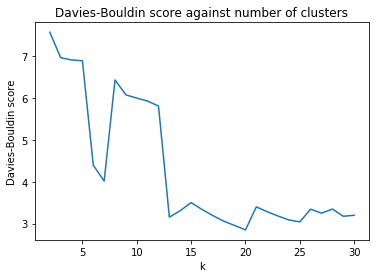

In [ ]:
#plot graph of k against silhouette score
db_scores=np.zeros(29)
k=range(2,31)
for K in k:
  kmeans_model = KMeans(n_clusters=K, random_state=0).fit(feature_matrix)
  labels = kmeans_model.labels_
  db_scores[K-2]=metrics.davies_bouldin_score(feature_matrix, labels)
plt.plot(k,db_scores)
plt.xlabel("k")
plt.ylabel("Davies-Bouldin score")
plt.title("Davies-Bouldin score against number of clusters")

With the above graph showing a clear downward trend, a sensible value for an optimal $k$ if we use the Davies-Bouldin score would be the lowest $k$ that results in $DB<4$,e.g.  $22$, the same $k$ we arrived at when we plotted our Calinski-Harabasz scores.

##A more general discussion of the k-means algorithm:##

The mini-batch k-means algorithm is a computationally more efficient algorithm than our standard k-means algorithm, which comes in handy when dealing with datasets of massive size, but the quality of our clustering is slightly poorer; we can demonstrate this in our code below. In mini-batch k means, there is an additional parameter called 'batch size' which determines the quantity of observations chosen (randomly) in each batch. The crucial difference between it and normal k-means is that in mini-batch k means, we do not utilize the whole dataset but a fixed quantity subsample when we iterate.


In [ ]:
import time
#import mini batch k means from sklearn
from sklearn.cluster import MiniBatchKMeans


In [ ]:
#use and time mini-batch k means with 22 clusters, batch size=100
start_time = time.time()
mini_batch_kmeans22 = MiniBatchKMeans(n_clusters=22, random_state=0,batch_size=100).fit(feature_matrix)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.25707483291625977 seconds ---


In [ ]:
#compare with run time of standard K means
start_time = time.time()
kmeans22 = KMeans(n_clusters=22, random_state=0).fit(feature_matrix)
print("--- %s seconds ---" % (time.time() - start_time))

--- 6.4219934940338135 seconds ---


In [ ]:
#compute within cluster dissimilarity for mini batch k means
mini_batch_labels = mini_batch_kmeans22.labels_
sum=0
X_np=feature_matrix.to_numpy()
for i in range(22):
  vc=[]
  for j in range(2485):
    if i==mini_batch_labels[j]:
      #append jth element of matrix if it belongs to i th cluster
      vc.append(X_np[j])
  for k in range(len(vc)):
    for l in range(len(vc)):
      #compute squared Euclidean distances between two vectors in the same cluster
      sum=sum+np.linalg.norm(vc[k]-vc[l])**2
#work out within cluster dissimilarity
W_C_minibatch=0.5*sum

In [ ]:
#display W_C
W_C_minibatch

44544657.0

We see that our within cluster dissimilarity $W(C)$ for our mini batch k means (44544657) is much higher than that of our standard k means (13415213), indicating that mini batch k means has a lower clustering quality.

The squared Euclidean distance involved in the algorithm means that the cluster mean is sensitive to the presence of few single outlier points. Celebi, Kingravi and Vela (2012) suggest that this problem, if it occurs, should be overcome by simply removing the outliers (this is known as 'outlier pruning') or using a different distance function, such as the Mahalanobis or Manhattan distance.

While the algorithm is simple to compute and conceptually easy to grasp, the outcome is highly sensitive to the initial seeds and applying normalization/standardization will completely alter our results.

##1.2 Analysis of the citation graph##
A graph is a mathematical object with nodes $\in V$ and edges $\in E$ connecting the nodes. Our $2485\times 2485$ adjacency matrix $\mathrm{A}$ can be represented as a graph with 2485 nodes: 
If $\mathrm{A}_{ij}=1$, then there is a line going from node $i$ to node $j$; if $\mathrm{A}_{ij}=0$, then there is no line. Each arrow going from $i$ to $j$ represents an edge $(i,j)$.

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
#import adjacency matrix
adj_matrix = pd.read_csv(io.BytesIO(uploaded['adjacency_matrix.csv']))

Saving adjacency_matrix.csv to adjacency_matrix.csv


In [ ]:
import networkx as nx

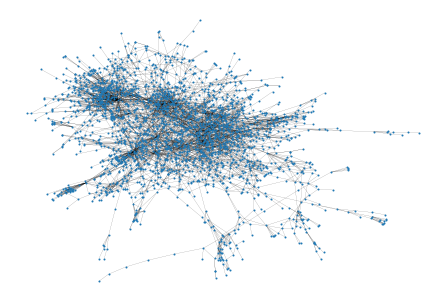

In [ ]:
import numpy as np
#use adjacency matrix to make graph
G = nx.from_numpy_matrix(np.matrix(adj_matrix))
pos = nx.spring_layout(G)
#draw graph
nx.draw(G, pos, edge_color='k',
         font_weight='light', node_size= 1, width= 0.1)

In [ ]:
#print nodes of graph
print("Nodes of graph: ")
print(G.nodes())
#print edges of graph
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

Our histogram shows that the vast majority of our 2485 nodes-all but four- have degrees between 1 and 90.

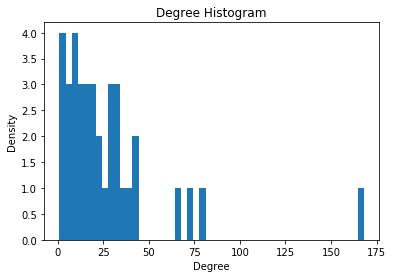

In [ ]:
import collections
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
#draw histogram of degree with 50 bins
fig, ax = plt.subplots()
plt.hist(deg, bins=50)
#give title and label axes
plt.title("Degree Histogram")
plt.ylabel("Density")
plt.xlabel("Degree")
plt.show()

The three measures of centrality which we are asked to analyse are:

1. Degree Centrality: $C_d=\frac{d}{2E}$ where $d$ is the degree of the node- the number of other nodes it is connect with- and E is the number of edges of the graph.
2. Betweenness Centrality: $g(v)=\Sigma_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$, where $\sigma_{st}$ is the least number of nodes between node  $s$ to node $t$ and $\sigma_{st}(v)$ is the least number of nodes in a path that contains node $v$ between nodes $s$ and $t$.
3. PageRank centrality:For a node $i$, the PageRank centrality is the $i$th element of the vector $\vec{x} = \vec{\beta} (\mathrm{I} - \alpha \mathrm{D}^{-1}\mathrm{A})^{-1}$, where $\mathrm{A}$ is our adjacency matrix, $\mathrm{D}$ is diagonal vector such that $D_{i,j}=d_i$, the degree of node i, if $i=j$ and $0$ if $i \neq j$, $\beta$ is a vector of positive constants and $\alpha$ is a damping parameter, set by default to $\alpha=0.85$ 

In [ ]:
#show degrees of each node
#Note: we start from 0 (not 1) throughout
degrees = [val for (node, val) in G.degree()]


In [ ]:
#make list of degree centrality
nx.degree_centrality(G)
degcent_list=[ v for v in dict.values(nx.degree_centrality(G)) ]
degcent_list

[0.0012077294685990338,
 0.0012077294685990338,
 0.002012882447665056,
 0.002012882447665056,
 0.0012077294685990338,
 0.001610305958132045,
 0.0012077294685990338,
 0.0008051529790660225,
 0.0008051529790660225,
 0.0008051529790660225,
 0.0008051529790660225,
 0.002012882447665056,
 0.001610305958132045,
 0.001610305958132045,
 0.002012882447665056,
 0.002012882447665056,
 0.00040257648953301127,
 0.002012882447665056,
 0.0008051529790660225,
 0.002012882447665056,
 0.002818035426731079,
 0.001610305958132045,
 0.001610305958132045,
 0.00040257648953301127,
 0.0008051529790660225,
 0.0024154589371980675,
 0.001610305958132045,
 0.0036231884057971015,
 0.00040257648953301127,
 0.0012077294685990338,
 0.00322061191626409,
 0.0012077294685990338,
 0.001610305958132045,
 0.002818035426731079,
 0.0012077294685990338,
 0.001610305958132045,
 0.0008051529790660225,
 0.0024154589371980675,
 0.0024154589371980675,
 0.0008051529790660225,
 0.0008051529790660225,
 0.0036231884057971015,
 0.00080

In [ ]:
#make list of betweenness centrality
betcent=nx.betweenness_centrality(G)
betcent_list=[ v for v in dict.values(betcent) ]

In [ ]:
 #make list of PageRank centrality
 pr = nx.pagerank(G, alpha=0.9)
pr_list = [ v for v in dict.values(pr) ]

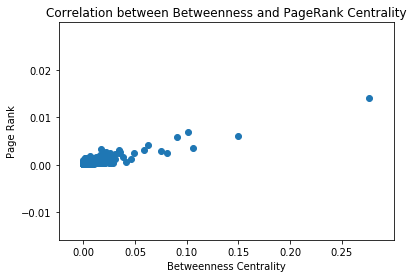

In [ ]:
#plot scatter graph of betweenness centrality against pagerank centrality
plt.scatter(x=betcent_list,y=pr_list)
#label graph
plt.title("Correlation between Betweenness and PageRank Centrality")
plt.ylabel("Page Rank")
plt.xlabel("Betweenness Centrality")
plt.show()

In [ ]:
from scipy.stats.stats import pearsonr
#calculate Pearson's correlation coefficient between our centrality lists   
pearsonr(pr_list,betcent_list)


(0.885545410817894, 0.0)

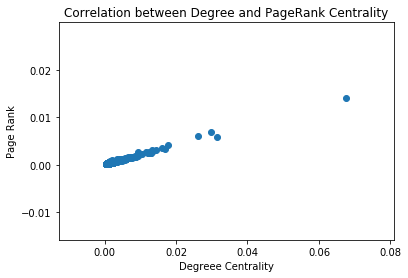

In [ ]:
#plot scatter graph of degree centrality against pagerank centrality
plt.scatter(x=degcent_list,y=pr_list)
plt.title("Correlation between Degree and PageRank Centrality")
plt.ylabel("Page Rank")
plt.xlabel("Degreee Centrality")
plt.show()

In [ ]:
pearsonr(pr_list,degcent_list)


(0.9918918361136774, 0.0)

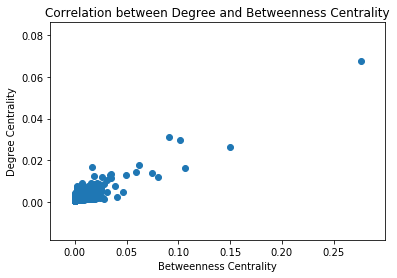

In [ ]:
#plot scatter graph of degree centrality against betweenness centrality
plt.scatter(x=betcent_list,y=degcent_list)
plt.title("Correlation between Degree and Betweenness Centrality")
plt.ylabel("Degree Centrality")
plt.xlabel("Betweenness Centrality")
plt.show()

In [ ]:
pearsonr(degcent_list,betcent_list)


(0.8769264142564778, 0.0)

We ought to record the corresponding nodes of those few points (four in the case of degree centrality)  that lie visibly away from the rest in each of the three graphs:

In [ ]:
#find nodes with 4 highest pr_list values
print( sorted( [(x,i) for (i,x) in enumerate(pr_list)], reverse=True )[:4] )
#repeat for degree centrality and betweenness centrality
print( sorted( [(x,i) for (i,x) in enumerate(degcent_list)], reverse=True )[:4] )
print( sorted( [(x,i) for (i,x) in enumerate(betcent_list)], reverse=True )[:4] )


[(0.01407069380215692, 1245), (0.006991914774371521, 1563), (0.006077748494721055, 1846), (0.005935480596536618, 271)]
[(0.06763285024154589, 1245), (0.03140096618357488, 271), (0.029790660225442835, 1563), (0.02616747181964573, 1846)]
[(0.27611427872076355, 1245), (0.14976342886230792, 1846), (0.10610938587659496, 1894), (0.1013549617553937, 1563)]


The correlation between all three centrality measures is very high, but the correlation between degree centrality and PageRank centrality (0.991891836113677) is noticeably higher than the correlation between degree centrality and betweenness centrality (0.8769264142564778) and the correlation between betweenness centrality and PageRank centrality (0.885545410817894). The reason for this lies in the fact that the degree of the node $d_i$ is explicitly used in the degree and PageRank centrality formulae but not for the betweenness centrality formula. A recent paper, published by Oldham, Fulcher, Parkes et al. (2019) explains that nodes which are connected to many other nodes in its own cluster (i.e. located in a cluster with many nodes), which themselves are well connected, but share few edges with nodes outside its own cluster, have higher degree and eigenvector based centralities (of which PageRank is a variant) than betweenness centrality. 

##1.3 Community detection on the citation graph##
The Clauset-Newman-Moore greedy algorithm (2004) is a clustering method for large networks. The algorithm is as follows:

First, some key definitions:

1. The modularity $Q$ of a partition of a graph is $\frac{1}{2m}\sum_{ij}[\mathrm{A}_{ij}-\frac{d_{i}d_{j}}{2m}]\delta(c_i,c_j)$, where $\mathrm{A}_{ij}$ is once again the $i,j$th entry of our adjacency matrix, $d_i$ is the degree of node $i$, $c_i$ is community $i$, $m$ is the number of edges, and $\delta(c_i,c_j)$ is the Kronecker delta with $\delta(c_i,c_j)=1$ if $c_i=c_j$ and $\delta(c_i,c_j)=0$ if $c_i \neq c_j$.
Intuitively, the $Q$ measures how well our partition defines communities as opposed to a random partition of the graph.
2. Next, we define $\Delta Q_{ij}$ to be $\frac{1}{2m}-\frac{d_i d_j}{(2m)^2}$ if $i,j$ share an edge and $0$ if they don't. $\Delta Q_{ij}$ is the change in $Q$ if we combine $c_i$ and $c_j$ into one community.

Which leads us onto the algorithm itself:

1. Compute $\Delta Q_{i,j}$ for all communities $i,j$. Merge $c_i$ and $c_j$ that maximizes $\Delta Q_{i,j}$
2. Repeat until there is only a single community remaining.

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
#perform Clauset-Newman-Moore greedy algorithm on graph
c = list(greedy_modularity_communities(G))
c

[frozenset({4,
            7,
            13,
            23,
            28,
            39,
            46,
            51,
            52,
            57,
            64,
            65,
            74,
            89,
            93,
            96,
            97,
            113,
            134,
            148,
            151,
            152,
            164,
            165,
            177,
            195,
            198,
            199,
            215,
            217,
            231,
            236,
            255,
            256,
            261,
            266,
            276,
            283,
            286,
            290,
            292,
            297,
            301,
            305,
            310,
            317,
            321,
            322,
            323,
            328,
            331,
            335,
            350,
            363,
            383,
            385,
            406,
            420,
            422,
            434,

In [ ]:
#show number of communities found by Clauset-Newman-Moore algorithm
len(c)


29

In [ ]:
lab=[]
for i in range(2485):
  for j in range(29):
    if i in sorted(c[j]):
      lab.append(j)

In [ ]:
#print community each node belongs to
lab

[3,
 7,
 3,
 18,
 0,
 4,
 14,
 0,
 3,
 8,
 5,
 10,
 17,
 0,
 3,
 2,
 5,
 6,
 10,
 11,
 3,
 1,
 5,
 0,
 11,
 8,
 1,
 13,
 0,
 24,
 2,
 7,
 9,
 11,
 5,
 1,
 1,
 11,
 9,
 0,
 6,
 10,
 10,
 7,
 21,
 4,
 0,
 14,
 8,
 1,
 8,
 0,
 0,
 7,
 8,
 4,
 13,
 0,
 8,
 7,
 3,
 1,
 6,
 3,
 0,
 0,
 4,
 1,
 8,
 9,
 2,
 4,
 4,
 12,
 0,
 9,
 10,
 1,
 1,
 11,
 20,
 3,
 1,
 9,
 4,
 1,
 7,
 1,
 4,
 0,
 2,
 2,
 9,
 0,
 6,
 2,
 0,
 0,
 2,
 7,
 22,
 1,
 1,
 1,
 6,
 8,
 2,
 2,
 6,
 2,
 6,
 7,
 1,
 0,
 6,
 2,
 2,
 15,
 2,
 15,
 2,
 2,
 11,
 10,
 4,
 3,
 8,
 1,
 12,
 8,
 5,
 11,
 11,
 2,
 0,
 20,
 20,
 3,
 10,
 5,
 3,
 1,
 1,
 6,
 1,
 3,
 13,
 3,
 0,
 5,
 4,
 0,
 0,
 1,
 3,
 12,
 23,
 3,
 5,
 1,
 26,
 26,
 3,
 14,
 0,
 0,
 8,
 2,
 4,
 6,
 12,
 9,
 13,
 3,
 12,
 7,
 3,
 0,
 7,
 1,
 7,
 3,
 23,
 12,
 10,
 1,
 16,
 8,
 3,
 5,
 12,
 9,
 5,
 20,
 20,
 0,
 10,
 3,
 0,
 0,
 14,
 5,
 3,
 3,
 6,
 22,
 3,
 2,
 7,
 6,
 8,
 4,
 7,
 8,
 12,
 0,
 13,
 0,
 11,
 8,
 5,
 1,
 5,
 5,
 1,
 4,
 4,
 11,
 27,
 14,
 1,
 0,
 6,
 7,
 1,
 3,


The Clauset-Newman-Moore algorithm has detected 29 communities. We now plot our clusters in our graph from part 1.2, using different colors for each of our nodes:

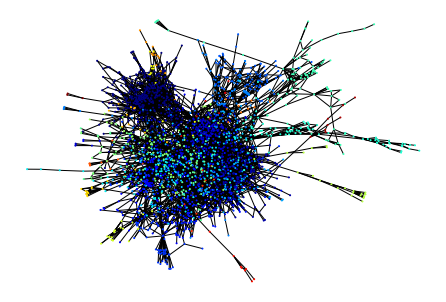

In [ ]:
import networkx as nx
#draw each node in different color for C-N-M algorithm
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = lab, node_size=1, with_labels=False)

In [ ]:
#show our communities
sorted(c)

[frozenset({4,
            7,
            13,
            23,
            28,
            39,
            46,
            51,
            52,
            57,
            64,
            65,
            74,
            89,
            93,
            96,
            97,
            113,
            134,
            148,
            151,
            152,
            164,
            165,
            177,
            195,
            198,
            199,
            215,
            217,
            231,
            236,
            255,
            256,
            261,
            266,
            276,
            283,
            286,
            290,
            292,
            297,
            301,
            305,
            310,
            317,
            321,
            322,
            323,
            328,
            331,
            335,
            350,
            363,
            383,
            385,
            406,
            420,
            422,
            434,

In [ ]:
#show thirty nodes with highest degree centrality and the corresponding degree centralities
degcent_ranks = sorted( [(x,i) for (i,x) in enumerate(degcent_list)], reverse=True )
degcent_values = []
degcent_posns = []
for x,i in degcent_ranks:
    if x not in degcent_values:
        degcent_values.append( x )
        degcent_posns.append( i )
        if len(degcent_values) == 30:
            break
print(degcent_posns)
print(degcent_values)

[1245, 271, 1563, 1846, 1672, 1491, 1894, 78, 926, 542, 1905, 1774, 1418, 666, 1122, 1321, 1362, 1034, 2033, 1298, 2013, 2236, 1833, 2462, 1787, 2295, 2285, 2225, 2178, 2280]
[0.06763285024154589, 0.03140096618357488, 0.029790660225442835, 0.02616747181964573, 0.017713365539452495, 0.016908212560386472, 0.01610305958132045, 0.014492753623188406, 0.013687600644122383, 0.013285024154589372, 0.01288244766505636, 0.01247987117552335, 0.012077294685990338, 0.011674718196457327, 0.010466988727858293, 0.009259259259259259, 0.008856682769726247, 0.008454106280193236, 0.007648953301127214, 0.007246376811594203, 0.006843800322061192, 0.00644122383252818, 0.006038647342995169, 0.005636070853462158, 0.005233494363929146, 0.004830917874396135, 0.004428341384863124, 0.004025764895330112, 0.0036231884057971015, 0.00322061191626409]


In [ ]:
#show the distribution of the top 30 nodes by degree centrality
dc=[]
for j in degcent_posns:
  for i in range(29):
    if j in sorted(c[i]):
      dc.append(i+1)

In [ ]:
dc

[1,
 3,
 4,
 4,
 6,
 3,
 11,
 2,
 2,
 4,
 3,
 2,
 6,
 10,
 2,
 8,
 1,
 9,
 5,
 5,
 5,
 2,
 2,
 13,
 9,
 12,
 1,
 14,
 14,
 1]

In [ ]:
#repeat for pagerank centrality
pr_ranks = sorted( [(x,i) for (i,x) in enumerate(pr_list)], reverse=True )
pr_values = []
pr_posns = []
for x,i in pr_ranks:
    if x not in pr_values:
        pr_values.append( x )
        pr_posns.append( i )
        if len(pr_values) == 30:
            break
print(pr_posns)
print(pr_values)

[1245, 1563, 1846, 271, 1672, 1894, 1491, 78, 542, 926, 1774, 666, 1321, 1905, 95, 977, 1418, 1122, 951, 1071, 374, 1034, 2033, 84, 103, 1555, 1362, 1298, 882, 600]
[0.01407069380215692, 0.006991914774371521, 0.006077748494721055, 0.005935480596536618, 0.004117134800420889, 0.0036290118448003817, 0.0032424512553994806, 0.003080634498472179, 0.003025634139523468, 0.0029091289955703904, 0.002758591637443089, 0.002649255671848693, 0.0025882840761364515, 0.002475614575146868, 0.00247256583039996, 0.0024346091132892702, 0.0024013206187655685, 0.0021842970863248223, 0.002039193035190767, 0.0019256589864552632, 0.0018008827129152125, 0.0017143051031388958, 0.001707280353612639, 0.0017065467962942345, 0.0016893995135271954, 0.001686361160275822, 0.0016284283091345518, 0.0015931127957292141, 0.0015848409319598287, 0.0015640685675707457]


In [ ]:
pc=[]
for j in pr_posns:
  for i in range(29):
    if j in sorted(c[i]):
      pc.append(i+1)
pc

[1,
 4,
 4,
 3,
 6,
 11,
 3,
 2,
 4,
 2,
 2,
 10,
 8,
 3,
 3,
 1,
 6,
 2,
 5,
 1,
 2,
 9,
 5,
 5,
 2,
 5,
 1,
 5,
 12,
 8]

20 out of the 30 highest nodes by degree centrality are also found in the list of the 30 highest nodes by PageRank centrality. 

Footnote: 

We can actually do better than the Clauset-Newman-Moore algorithm if we measure performance in terms of the modularity $Q$ as defined above, e.g. the Louvain algorithm.


##1.4 Compare feature and graph clusterings##
The adjusted random index (ARI) and the adjusted mutual information score (AMI) are two indices that score the similarities of two optimal clusterings.

If we have n numbers and two different partitions of those numbers represented by $X=\{X_1,...X_k\}$ and $Y=\{Y_1,...,Y_l\}$, let $n_{ij}=|X_i \cap Y_j|$, $a_i=\sum_j n_{ij}$ and $b_j=\sum_i n_{ij}$.

$ARI=\frac{\sum_{ij} {n_{ij}\choose 2}-[\sum_i {a_{i}\choose 2}\sum_j {b_{j}\choose 2}]/{n\choose 2}}{\frac{1}{2}[\sum_i {a_i\choose 2}+\sum_j {b_j\choose 2}]-[\sum_i {a_i\choose 2}\sum_j{b_j\choose 2}]/{n\choose 2}}$. For a totally random cluster, the ARI is $0$, and an ARI of $1$ indicates best possible agreement between our partitions.

For the adjusted mutual information, we first define the mutual information $MI(U,V)$, where U and V are sets of clusters:

$MI(U,V)=\sum^{R}_{i=1}\sum^{C}_{j=1} P(i,j)\log \frac{P(i,j)}{P(i)P'(j)}$ with $P(i,j)=\frac{|U_i \cap V_j|}{N}$.

Then $AMI(U,V)=\frac{MI(U,V)-\mathrm{E}\{MI(U,V)\}}{\max\{H(U),H(V)\}-\mathrm{E}\{MI(U,V)\}}$ ($MI$ normalized against chance) where $H(U)=-\sum^{R}_{i=1}P(i)\log P(i)$.

The ARI and AMI are examples of 'extrinsic' metrics which require ground truth labels, unlike the 'intrinsic' Calinski-Harabasz and Silhouette scores which we calculated earlier, which can be a major disadvantage, as there are many circumstances under which we don't know the ground truth labels.




In [ ]:
#output labels for Clauset-Newman-Moore algorithm
cnm_labels=[]
for j in range(2485):
  for i in range(29):
    if j in sorted(c[i]):
      cnm_labels.append(i)
cnm_labels

[3,
 7,
 3,
 18,
 0,
 4,
 14,
 0,
 3,
 8,
 5,
 10,
 17,
 0,
 3,
 2,
 5,
 6,
 10,
 11,
 3,
 1,
 5,
 0,
 11,
 8,
 1,
 13,
 0,
 24,
 2,
 7,
 9,
 11,
 5,
 1,
 1,
 11,
 9,
 0,
 6,
 10,
 10,
 7,
 21,
 4,
 0,
 14,
 8,
 1,
 8,
 0,
 0,
 7,
 8,
 4,
 13,
 0,
 8,
 7,
 3,
 1,
 6,
 3,
 0,
 0,
 4,
 1,
 8,
 9,
 2,
 4,
 4,
 12,
 0,
 9,
 10,
 1,
 1,
 11,
 20,
 3,
 1,
 9,
 4,
 1,
 7,
 1,
 4,
 0,
 2,
 2,
 9,
 0,
 6,
 2,
 0,
 0,
 2,
 7,
 22,
 1,
 1,
 1,
 6,
 8,
 2,
 2,
 6,
 2,
 6,
 7,
 1,
 0,
 6,
 2,
 2,
 15,
 2,
 15,
 2,
 2,
 11,
 10,
 4,
 3,
 8,
 1,
 12,
 8,
 5,
 11,
 11,
 2,
 0,
 20,
 20,
 3,
 10,
 5,
 3,
 1,
 1,
 6,
 1,
 3,
 13,
 3,
 0,
 5,
 4,
 0,
 0,
 1,
 3,
 12,
 23,
 3,
 5,
 1,
 26,
 26,
 3,
 14,
 0,
 0,
 8,
 2,
 4,
 6,
 12,
 9,
 13,
 3,
 12,
 7,
 3,
 0,
 7,
 1,
 7,
 3,
 23,
 12,
 10,
 1,
 16,
 8,
 3,
 5,
 12,
 9,
 5,
 20,
 20,
 0,
 10,
 3,
 0,
 0,
 14,
 5,
 3,
 3,
 6,
 22,
 3,
 2,
 7,
 6,
 8,
 4,
 7,
 8,
 12,
 0,
 13,
 0,
 11,
 8,
 5,
 1,
 5,
 5,
 1,
 4,
 4,
 11,
 27,
 14,
 1,
 0,
 6,
 7,
 1,
 3,


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
#compute ARI
print(adjusted_rand_score(labels,cnm_labels))
#compute AMI
print(adjusted_mutual_info_score(labels,cnm_labels))

0.05807204116693103
0.12629952224211555


It turns out that our according to our low ARI and AMI scores, our optimal clusterings for k means and Clauset-Newman-Moore have little similarity.

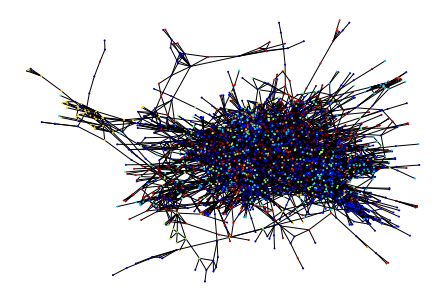

In [ ]:
#give each node different color for clusters obtained in part 1.1
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = labels, node_size=1, with_labels=False)

The diagrams look very different in shape. In both cases, there are over 20 colors displayed,but our graph drawn from the k-means algorithm from 1.1 looks like it is dominated by only a few (6 or 7) colors.

#Task 2: Classification of a set of images#

In our second task, we are given a famous set of fashion images called 'Fashion-MNIST', a variant of the original MNIST dataset, of which 60000 are in the training set and the remaining 10000 belong to the test set. We perform both unsupervised (2.1) and supervised (2.2) learning tasks, followed by a comparison of all three classifiers mentioned (2.3).

##2.1 Unsupervised clustering of the image dataset##
In 2.1, we interpret our images as 784-dimensional vectors.
Once again, we run the k-means for all values of k between 2 and 30, and plot the two useful heuristics we mentioned in part 1: the Calinski-Harabasz score and the Davies-Bouldin score. 

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
#import trainset with pandas
trainset = pd.read_csv(io.BytesIO(uploaded['fashion-mnist_train.csv']))

Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [ ]:
from sklearn.cluster import KMeans
#separate the y from the rest of the trainset
y_trainset=trainset['label']
X_trainset= trainset.drop('label', 1)

Text(0.5, 1.0, 'Calinski-Harabasz score against number of clusters')

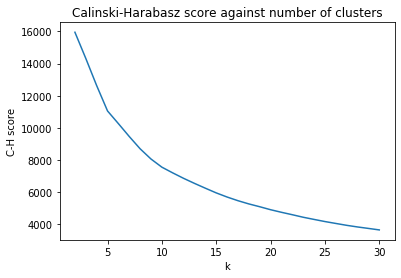

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn import metrics
#compute Calinski-Harabasz for trainset
ch_scores=np.zeros(29)
k=range(2,31)
for K in k:
  kmeans_model = KMeans(n_clusters=K, random_state=0).fit(X_trainset)
  labels = kmeans_model.labels_
  ch_scores[K-2]=metrics.calinski_harabasz_score(X_trainset, labels)
plt.plot(k,ch_scores)
plt.xlabel("k")
plt.ylabel("C-H score")
plt.title("Calinski-Harabasz score against number of clusters")

In [ ]:
print(ch_scores)
#find lowest k with CH_score lower than 7000
[ n+1 for n,i in enumerate(ch_scores) if i<7000 ][1]

[15949.15693024 14321.34977174 12630.13663204 11051.5288682
 10263.02417673  9460.79808615  8696.83206017  8060.43079145
  7554.06936205  7197.6458633   6858.38327277  6544.89084539
  6245.33346606  5953.45892419  5696.2461266   5467.89369536
  5267.32307216  5092.78663778  4906.99759588  4746.31814091
  4595.22167197  4438.39833139  4303.12223993  4170.46300518
  4052.73768462  3935.7374115   3834.02786932  3743.10121216
  3650.06741213]


12

[1.89149648 1.72587021 1.80114936 1.92931782 1.83807491 1.91402852
 1.91692772 1.87628853 1.8833177  1.95462919 2.00915355 2.03193639
 2.07542622 2.1094081  2.10825202 2.10303704 2.10379504 2.10065214
 2.11789818 2.13658975 2.16146402 2.17887343 2.19585786 2.21728731
 2.19889023 2.27400806 2.25193237 2.29127543 2.31124727]


Text(0.5, 1.0, 'Davies-Bouldin score against number of clusters')

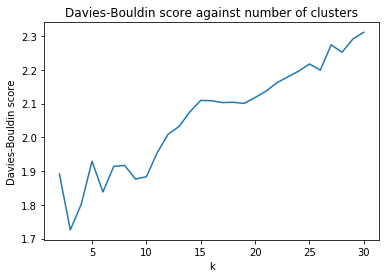

In [ ]:
#plot graph of k against Davies-Bouldin score
db_scores=np.zeros(29)
k=range(2,31)
for K in k:
  kmeans_model = KMeans(n_clusters=K, random_state=0).fit(X_trainset)
  labels = kmeans_model.labels_
  db_scores[K-2]=metrics.davies_bouldin_score(X_trainset, labels)
print(db_scores)
plt.plot(k,db_scores)
plt.xlabel("k")
plt.ylabel("Davies-Bouldin score")
plt.title("Davies-Bouldin score against number of clusters")


Here, unlike our previous example, the Calinski-Harabasz score decreases monotonically between k=2 and k=30. Since the C-H has decreased sufficiently by k=10, it would be reasonable to state that there are 10 classes in the data. Our conclusion that k=10 is sensible is supported by the Davies-Bouldin score: k=10 has the fifth lowest D-B score out of the 29 k values we run.

And like before (in 1.1), we ought to print some of the properties of this optimal clustering:

In [ ]:
#use k=10 as k means model, fit model to trainset
kmeans10 = KMeans(n_clusters=10, random_state=0).fit(X_trainset)

In [ ]:
#print labels
labels = kmeans10.labels_

In [ ]:
#print centers and dimensions
import numpy as np
centers = np.array(kmeans10.cluster_centers_)
print(centers)
print(len(centers))
print(len(centers[1]))

[[ 1.07769696e-16  4.42354486e-17 -1.50573998e-15 ... -2.36255460e-13
   9.13713549e-14  9.32587341e-15]
 [ 3.08404009e-03  3.08404009e-03  9.25212028e-03 ...  1.34926754e-02
   1.92752506e-03  2.12027756e-03]
 [ 8.19504200e-04  4.60971112e-03  3.11411596e-02 ...  6.45062487e+00
   8.94898586e-01  5.25507068e-02]
 ...
 [ 2.62467192e-03  1.81102362e-02  1.62729659e-01 ...  1.69816273e-01
   5.45931759e-02  4.72440945e-03]
 [ 1.15033851e-16  1.06685494e-16 -7.49400542e-16 ... -2.38919995e-13
   9.33697564e-14  9.45077350e-15]
 [ 3.54534110e-17  2.12856535e-03  2.38399319e-02 ...  6.41549596e-01
   4.67432950e-01  9.32311622e-02]]
10
784


Being a BSc student, I believe that since I am not doing the mastery question which specifically asks for PCA, it should be alright to describe it in this section instead, given that there is no specific visualization method that has been requested.

With 784-dimensional cluster centroids, the way to visualize them in 2D space is to use principal component analysis (PCA) for dimensionality reduction from $p=784$ dimensions to $2=m<p$ dimensions. The mathematics of PCA is very long, so we shall only reproduce the key steps:

1. Express each point $\vec{x}^{(i)}$ as $\sum^{p}_{j=1} a_j^{(i)}\vec{\phi}_j$, where our $\vec{\phi}_j$ forms an orthonormal basis.

2. We seek to solve the optimization problem, in which we seek $\vec{\phi}*$ such that $\nabla L_{\phi_j}=0$ at  $\vec{\phi}*$, where $L=\sum^{p}_{j=m+1} \vec{\phi}^T C_X \vec{\phi}+\sum^{p}_{j=m+1}\lambda_j(1-\vec{\phi}^T\vec{\phi})$. $C_x$ is the $p \times p$ covariance matrix. After standard differentiation, we end up having to solve for $C_X \vec{\phi}*=\lambda_j\vec{\phi}*$, with the solution being $\{b*_j,\phi*_j\}$

3. We note that the mean squared error is therefore $MSE=\sum^{p}_{j=m+1} \vec{\phi}*^T C_X \vec{\phi}*=\sum^{p}_{j=m+1} \vec{\phi}*^T \lambda_j \vec{\phi}*=\sum^p_{j=m+1} \lambda_j$. In other words, $\phi*_j$ are the eigenvectors of $C_X$

4. We now have a look at the dimensionality reduction of $\vec{x}^{(i)}$ to $\vec{x_m}^{(i)}$:

$\vec{x}^{(i)}_m=\sum^m_{j=1} a_j^{(i)}\vec{\phi_j}+\sum^p_{j=m+1} b_j\vec{\phi_j}$.
5. After many further calculations, we discover that we have 'reduced' $\vec{x}^{(i)}$ to the m-dimensional $\sum^{m}_{j=1}({\vec{x}^{(i)}}^T \cdot \vec{\phi_j})\vec{\phi}_j$



In [ ]:
from sklearn.decomposition import PCA
#perform PCA on trainset
pca = PCA(n_components=2, whiten=True).fit(X_trainset)
#run k means algorithm on trainset with reduced dimensions
X_pca = pca.transform(X_trainset)
#fit the model
kmeans_pca = KMeans(n_clusters=10,random_state=0).fit(X_pca)

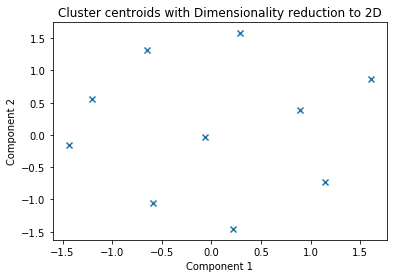

In [ ]:
#print cluster centers
centers_pca=kmeans_pca.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], marker='x')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Cluster centroids with Dimensionality reduction to 2D")
plt.show()

Our plotting with PCA applied to the trainset reveals ten roughly evenly spaced out cluster centroids.

In [ ]:

import pandas as pd
uploaded = files.upload()
import io
#import testset with pandas
testset = pd.read_csv(io.BytesIO(uploaded['fashion-mnist_test.csv']))

Saving fashion-mnist_test.csv to fashion-mnist_test.csv


In [ ]:
y_testset=testset['label']
X_testset= testset.drop('label', 1)

Although the k-nearest neighbors classification was actually discussed much earlier on in the course, as it has never been used in any coursework task up to now, we shall provide a short description:

1. Pick the number of neighbors $k$; in this case $k=10$
2. For each row of our training set $\vec{x}^{(i)}$, define the neighborhood $N_k (\vec{x}^{(i)})$ formed of the k nearest neigbors of $\vec{x}^{(i)}$
3. Then $\vec{y} \in C_q$ by majority or plurality vote. .

Note that we fit the model with our labels obtained from the k-means clustering, and NOT y_trainset!

Note: our outcome is very dependent on the number of neighbors we take into account. Here, we use $k=5$ as it isn't too computationally expensive.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_trainset, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predictor=neigh.predict(X_testset)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

We print out the accuracy score, precision score, recall score and F1 score for the test set. 

In [ ]:
#print accuracy, recall, precision and f1 scores
print(accuracy_score(y_testset,predictor))
print(precision_score(y_testset,predictor,average='macro'))
print(recall_score(y_testset,predictor,average='macro'))
print(f1_score(y_testset,predictor,average='macro'))

0.1157
0.08582472269469821
0.11569999999999998
0.09738427117657418


The accuracy score is an atrocious 11.57%, probably due to the fact that we don't use ground truth labels, though we defer further explanation until part 2.3.
A confusion matrix is provided for better visualization of the classification/misclassification:

Text(0.5, 257.44, 'Predicted')

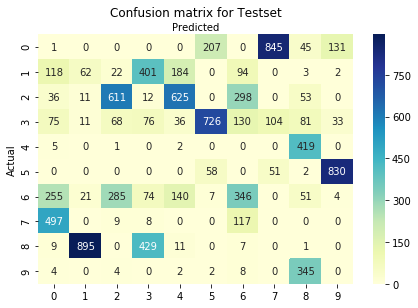

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = metrics.confusion_matrix(predictor, y_testset)
#create confusion matrix to compare predicted against actual values for k means model

class_names=[0,1,2,3,4,5,6,7,8,9] # name  of classes
fig, ax = plt.subplots()
tick = np.arange(len(class_names))
plt.xticks(tick, class_names)
plt.yticks(tick, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Testset', y=1.2)
plt.ylabel('Actual')
plt.xlabel('Predicted')

##2.2 Supervised classification of the training set##
Throughout this section, we implement our neural network with negative log-likelihood as our loss function, ReLu as the activation function and SGD for optimization. 

##2.2.1 MLP neural network supervised classification##

The poor performance of our k-means algorithm/k-NN compels us to seek another method for the accurate classification of our fashion MNIST test images. The multilayer perceptron model is simply a neural network, first introduced in coursework 2, with greater than two hidden layers-- three in our case, with each hidden layer equipped with 100 nodes. Here, we must vectorize our images so that we can feed them to our neural network.

Although we use PyTorch for most of this section, we have decided to visualize some of our images using Keras, another neural network/machine learning package.

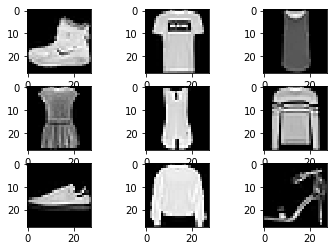

In [ ]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
for j in range(9):
	# make pyplot subplot
	pyplot.subplot(330+1 + j)
	#plot pixel data
	pyplot.imshow(X_train[j], cmap=pyplot.get_cmap('gray'))
# display images
pyplot.show()

In [ ]:
#import pytorch
import torch
import torch.nn as nn

In [ ]:
#convert data to PyTorch tensors
X_train = torch.from_numpy(X_trainset.to_numpy()).float()
y_train = torch.from_numpy(y_trainset.to_numpy())
X_test = torch.from_numpy(X_testset.to_numpy()).float()
y_test = torch.from_numpy(y_testset.to_numpy())

In [ ]:
#define hyperparameters
input_size = 784  
hidden_size = 100
num_classes = 10
num_epochs = 30
batch_size = 128
learning_rate = 0.005

In [ ]:
# loading data 
train = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size)

test = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size)

In [ ]:
import torch.utils.data
import torch.nn.functional as F
from sklearn.model_selection import GridSearchCV
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
           super(NeuralNet, self).__init__()
           self.fc1 = nn.Linear(input_size, hidden_size)
           self.fc2 = nn.Linear(hidden_size, hidden_size)
           self.fc3= nn.Linear(hidden_size,hidden_size)
           self.fc4 = nn.Linear(hidden_size,num_classes)         
  def forward(self, x):
          out = F.relu(self.fc1(x))
          out = F.relu(self.fc2(out))
          out= F.relu(self.fc3(out))
          out = self.fc4(out)
          #use log_softmax as we are using Neg log loss as loss function
          return F.log_softmax(out,dim=1)
#call network
net = NeuralNet(input_size, hidden_size, num_classes)
#define optimization function and loss function
optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()

In [ ]:
total_step = len(train_loader)
loss_values = []

for epoch in range(num_epochs+1):
  # train neural network
  net.train()
  train_loss = 0.0
  
  for i, (images, labels) in enumerate(train_loader):
    
    # vectorize images
    images = images.reshape(-1, 28*28)
    labels = labels
        
    # forward pass
    outputs = net(images)
    loss = criterion(outputs, labels)
        
    # backward and optimise
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    # show new train loss
    train_loss += loss.item()

    # print training loss, iteration and epoch
    if (i+1) % 100 == 0:
      print('Epoch [{}/{}] \t Iteration [{}/{}] \t Training Loss: {:.6f}'.format(epoch, num_epochs, i+1, total_step, train_loss / 100))
      train_loss = 0.0
  
  loss_values.append(train_loss / len(train_loader))

print('Finished Training')

Epoch [0/30] 	 Iteration [100/469] 	 Training Loss: 1.598384
Epoch [0/30] 	 Iteration [200/469] 	 Training Loss: 0.643075
Epoch [0/30] 	 Iteration [300/469] 	 Training Loss: 0.588768
Epoch [0/30] 	 Iteration [400/469] 	 Training Loss: 0.539979
Epoch [1/30] 	 Iteration [100/469] 	 Training Loss: 0.478901
Epoch [1/30] 	 Iteration [200/469] 	 Training Loss: 0.467194
Epoch [1/30] 	 Iteration [300/469] 	 Training Loss: 0.458876
Epoch [1/30] 	 Iteration [400/469] 	 Training Loss: 0.443630
Epoch [2/30] 	 Iteration [100/469] 	 Training Loss: 0.419264
Epoch [2/30] 	 Iteration [200/469] 	 Training Loss: 0.417199
Epoch [2/30] 	 Iteration [300/469] 	 Training Loss: 0.414722
Epoch [2/30] 	 Iteration [400/469] 	 Training Loss: 0.404887
Epoch [3/30] 	 Iteration [100/469] 	 Training Loss: 0.386309
Epoch [3/30] 	 Iteration [200/469] 	 Training Loss: 0.388470
Epoch [3/30] 	 Iteration [300/469] 	 Training Loss: 0.385799
Epoch [3/30] 	 Iteration [400/469] 	 Training Loss: 0.379590
Epoch [4/30] 	 Iteration

In [ ]:
net.eval()

correct = 0
total = 0
for images, labels in test_loader:
#reshape images to 28x28 matrices
  images = images.reshape(-1, 28*28)
  labels = labels
  #give predictions
  outputs = net(images)
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  #compute number of correct classifications
  correct += (predicted == labels).sum().item()

print('Test set accuracy: {} %'.format(100 * correct / total))

Test set accuracy: 88.17 %


As usual, we print the F1, precision and recall scores, as well as the confusion matrix.

In [ ]:
print("Test F1 :: :: ", f1_score(predicted, labels,average='micro'))
print("Test Precision :: :: ", precision_score(predicted, labels,average='micro'))
print("Test Recall :: :: ", recall_score(predicted, labels,average='micro'))

Test F1 :: ::  0.9375
Test Precision :: ::  0.9375
Test Recall :: ::  0.9375


##2.2.2 Convolutional neural network supervised classification##

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

    def num_flat_features(self, x):
        size = x.size()[1:] 
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
import torchvision
import torch.utils.data
from torch.autograd import Variable
import torch.nn.functional as F
fashion_mnist_data = torchvision.datasets.FashionMNIST(
    './fashion-mnist',
    transform=torchvision.transforms.ToTensor(),
    download=True)

data_loader = torch.utils.data.DataLoader(
    dataset=fashion_mnist_data,
    batch_size=batch_size,
    shuffle=True)

fashion_mnist_data_test = torchvision.datasets.FashionMNIST(
    './fashion-mnist',
    transform=torchvision.transforms.ToTensor(),
    train=False,
    download=True)


  0%|          | 16384/26421880 [00:00<03:03, 144048.78it/s]

26427392it [00:00, 62130277.68it/s]                            


Extracting ./fashion-mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./fashion-mnist/FashionMNIST/raw


32768it [00:00, 419868.62it/s]
0it [00:00, ?it/s]

Extracting ./fashion-mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./fashion-mnist/FashionMNIST/raw


4423680it [00:00, 15225231.42it/s]                           
8192it [00:00, 142239.24it/s]


Extracting ./fashion-mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./fashion-mnist/FashionMNIST/raw
Extracting ./fashion-mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./fashion-mnist/FashionMNIST/raw
Processing...
Done!


In [ ]:
import numpy as np
data_loader_test = torch.utils.data.DataLoader(
    dataset=fashion_mnist_data_test,
    batch_size=batch_size,
    shuffle=True)

# begin train process
using_cuda = torch.cuda.is_available()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()
if using_cuda:
    net.cuda()
    criterion.cuda()
#forward and backward pass
acc_scores = []
epochs = num_epochs
for i in range(epochs):
    for batch, labels in data_loader:
        if using_cuda:
            x = Variable(batch.cuda())
            y = Variable(labels.cuda())
        else:
            x = Variable(batch)
            y = Variable(labels)
        optimizer.zero_grad()
        output = net(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

    # see accuracy for test imgs
    n_true = 0
    for batch, labels in data_loader_test:
        if using_cuda:
            output = net(Variable(batch.cuda()))
        else:
            output = net(Variable(batch))
        _, predicted = torch.max(output.data, 1)
        if using_cuda:
            y_predicted = predicted.cpu().numpy()
        else:
            y_predicted = predicted.numpy()
        n_true += np.sum(y_predicted == labels.numpy())
#divide by length of test set
    test_acc = 100 * num_correct /10000
    print('epoch: {0}, accuracy: {1}'.format(i, accuracy))
    acc_scores.append(test_acc)

print(accuracies)


epoch: 0, accuracy: 19.76
epoch: 1, accuracy: 20.11
epoch: 2, accuracy: 22.32
epoch: 3, accuracy: 36.3
epoch: 4, accuracy: 59.1
epoch: 5, accuracy: 64.39
epoch: 6, accuracy: 67.83
epoch: 7, accuracy: 70.19
epoch: 8, accuracy: 71.67
epoch: 9, accuracy: 72.89
epoch: 10, accuracy: 74.19
epoch: 11, accuracy: 74.86
epoch: 12, accuracy: 74.72
epoch: 13, accuracy: 76.02
epoch: 14, accuracy: 75.44
epoch: 15, accuracy: 77.31
epoch: 16, accuracy: 78.2
epoch: 17, accuracy: 76.14
epoch: 18, accuracy: 79.0
epoch: 19, accuracy: 79.37
epoch: 20, accuracy: 79.73
epoch: 21, accuracy: 79.52
epoch: 22, accuracy: 79.92
epoch: 23, accuracy: 80.42
epoch: 24, accuracy: 81.21
epoch: 25, accuracy: 81.47
epoch: 26, accuracy: 81.95
epoch: 27, accuracy: 81.54
epoch: 28, accuracy: 81.62
epoch: 29, accuracy: 82.3
[19.76, 20.11, 22.32, 36.3, 59.1, 64.39, 67.83, 70.19, 71.67, 72.89, 74.19, 74.86, 74.72, 76.02, 75.44, 77.31, 78.2, 76.14, 79.0, 79.37, 79.73, 79.52, 79.92, 80.42, 81.21, 81.47, 81.95, 81.54, 81.62, 82.3]

The test accuracy after the 30 epochs was 82.3%

In [ ]:
print(precision_score(labels.numpy(),y_predicted,average='macro'))
print(recall_score(labels,y_predicted,average='macro'))
print(f1_score(labels,y_predicted,average='macro'))

0.9583333333333333
0.9375
0.9333333333333333


##2.2.3 Comparison of the classifiers##

The main questions we wish to answer are the following:
1. How do we compare our two neural networks: the multilayer perceptron (MLP) or the convolutional neural network (CNN)?
2. Why do both our neural networks perform better than our k-means algorithm?
3. Can we further increase the accuracy of our CNN, ideally above 90%?


###1. Comparing MLP and CNN###

A CNN is preferable to an MLP for image classification:
- An MLP is composed of fully connected layers; that is, all perceptrons are linked to one another.  This means that the number of parameters (99404) in our case in the MLP is very large and the network becomes inefficient to run. 

- The MLP does not take into account spatial information as its inputs have been converted from a matrix to a vector.

- The layers in a CNN are not fully connected. The strength of the CNN lies in its ability to take local connectivity into consideration. The size of the weights aren't as large as those in the MLP, which allows for more efficient training. 


###2. A neural network has a number of advantages over a k-NN classifier:###
- Our k-NN classifier is much slower than either of the two neural networks; this is in spite of the fact that there exists only one hyperparameter (k) in kNN, whereas in neural networks (especially MLPs), there can be thousands of hyperparameters determining the manner in which the network operates.
-Once trained, a neural network will be able to make predictions without further reliance on the training data; this is not the case with the kNN

###We shall discuss two methods of improving accuracy of the CNN:###

1. The optimization function has been changed from optim.SGD to optim.Adam, which is a much faster optimizer.
2. We have reduced the batch size from 128 to 32, as a smaller batch size enables better generalization, though the precise reason still remains unknown.

3. We implement dropout regularization after the final layer; that is, we ignore certain randomly selected neurons in our learning process with a probability $p$ known as the dropout rate. Here, we shall set $p=0.4$.

The contribution of these ignored neurons to the activation of the downstream neurons is erased when we forward pass and any changes to the weight vectors is not implemented when we backward pass.  

The weights are adjusted for certain characteristics which enables them to specialize, but over-specialization can mean that our classifier is overfitting our training set.

If we drop out certain neurons, then other neurons will assume the role of those missing neurons in making predictions. As a result, the sensitivity of the entire CNN to the specific weight vectors of neurons reduces. 

This is why dropout regularization improves our network's ability to generalize and hence reduces the overfitting problem. 

We use skorch, a module which allows us to perform 5-fold cross valdiation on the training set and return our corresponding cross validation score. 


These steps should hopefully suffice, although if we wanted to not only push our accuracy to over 90% as requested in the task but also to get it as close to 100% as possible, we could have also tried further measures such as weight decay or activation constraint to avoid overreliance on large weights/activations.

4. We change our learning rate to 0.005 as optim.adam works better with low learning rates.

In [ ]:
pip install -U skorch


     |████████████████████████████████| 112kB 8.1MB/s 


In [ ]:
batch_size=32

In [ ]:
import skorch
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 4 * 4, 120) 
        self.dropout=nn.Dropout(0.3)

        self.fc2= nn.Linear(120,100)
        self.fc3= nn.Linear(100,100)
        self.fc4= nn.Linear(100,100)
        self.fc5=nn.Linear(100,100)
        self.fc6=nn.Linear(100,100)
        self.fc7=nn.Linear(100,100)
        self.fc8=nn.Linear(100,100)
        self.fc9 = nn.Linear(100, 84)
        self.fc10 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x=self.dropout(x)
        x = F.selu(self.fc2(x))
        x=F.selu(self.fc3(x))
        x= F.selu(self.fc4(x))
        x=self.dropout(x)
        x= F.selu(self.fc5(x))
        x=F.selu(self.fc6(x))
        x=F.selu(self.fc7(x))
        x=self.dropout(x)
        x=F.selu(self.fc8(x))
        x=F.selu(self.fc9(x))
        x=self.dropout(x)
        x = self.fc10(x)
        return F.softmax(x, dim=0)

    def num_flat_features(self, x):
        size = x.size()[1:] 
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net=Net()
print(net)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=120, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=120, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=100, bias=True)
  (fc6): Linear(in_features=100, out_features=100, bias=True)
  (fc7): Linear(in_features=100, out_features=100, bias=True)
  (fc8): Linear(in_features=100, out_features=100, bias=True)
  (fc9): Linear(in_features=100, out_features=84, bias=True)
  (fc10): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
#reshape data
X_train_reshaped=X_train.reshape(60000,1,28,28)
X_test_reshaped=X_test.reshape(10000,1,28,28)


In [ ]:
learning_rate=0.005
batch_size=32

In [ ]:
from skorch import NeuralNetClassifier
#create neural net classifier
netclassifier = NeuralNetClassifier(net,max_epochs=num_epochs,lr=learning_rate,criterion=torch.nn.NLLLoss,optimizer=torch.optim.Adam,batch_size=batch_size,device='cuda')
#apply 5 fold cross validation
cross_val_score(netclassifier,X_train_reshaped,y_train,cv=5)
#fit model to initialize it


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.2565       0.7781        1.8742  7.4979
      2        1.9346       0.8282        1.7751  7.5570
      3        1.8491       0.8486        1.7329  7.3613
      4        1.7999       0.8517        1.7161  7.3894
      5        1.7602       0.8574        1.6994  7.5236
      6        1.7314       0.8695        1.6815  7.5940
      7        1.7056       0.8670        1.6791  7.6096
      8        1.6846       0.8708        1.6657  7.5323
      9        1.6679       0.8738        1.6642  7.4647
     10        1.6521       0.8752        1.6565  7.6265
     11        1.6352       0.8715        1.6670  7.3988
     12        1.6230       0.8774        1.6582  7.4293
     13        1.6081       0.8760        1.6497  7.4477
     14        1.6018       0.8807        1.6450  7.6034
     15        1.5889       0.8838        1.6404  7.4180
     16        1.5794       0.8

array([0.88983333, 0.88933333, 0.8895    , 0.88841667, 0.8945    ])

Sadly, despite all our best efforts, we weren't quite able to get the accuracy to 90%, though we did definitely improve from our original 83%  to  ~ 89 % from 2.2.2.

#Bibliography#
Out of an abundance of caution, the papers I mentioned throughout my coursework will be cited below in full:
1. T. Su and J. G. Dy, "A Deterministic Method for Initializing K-means Clustering," Proceedings of the 16th IEEE International Conference on Tools with Artificial Intelligence, pages 784-786, November, 2004, Boca Raton, Florida.
2. M. Celebi, H. Kingravi, T. Vela, "A Comparative Study of Efficient Initialization Methods for the K-Means Clustering Algorithm", Expert Systems with Applications 40 (2013) 200-210, 2012

